In [7]:
suppressMessages(library(ArchR))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(harmony))
suppressMessages(library(dplyr))
suppressMessages(library(cowplot))
suppressMessages(library(harmony))
suppressMessages(library(Nebulosa))
suppressMessages(library(ggpubr))
suppressMessages(library(Ipaper))

In [ ]:
set.seed(42)
getwd()

In [2]:
coembed <- readRDS("../data/coembed/coembed.Rds")
coembed

An object of class Seurat 
221802 features across 52618 samples within 3 assays 
Active assay: RNA (28933 features, 2000 variable features)
 2 other assays present: peaks, GeneActivity
 4 dimensional reductions calculated: pca, umap, harmony, umap_harmony

In [3]:
# Idents(coembed) <- "RNA_snn_res.0.6"

# options(repr.plot.height = 4, repr.plot.width = 8)
# VlnPlot(coembed, features = "SCARA5", pt.size = 0)

In [9]:
resolutions <- seq(0.2, 1, 0.1)

`summarise()` has grouped output by 'patient_region_id'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'patient_region_id'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'patient_region_id'. You can override using the `.groups` argument.



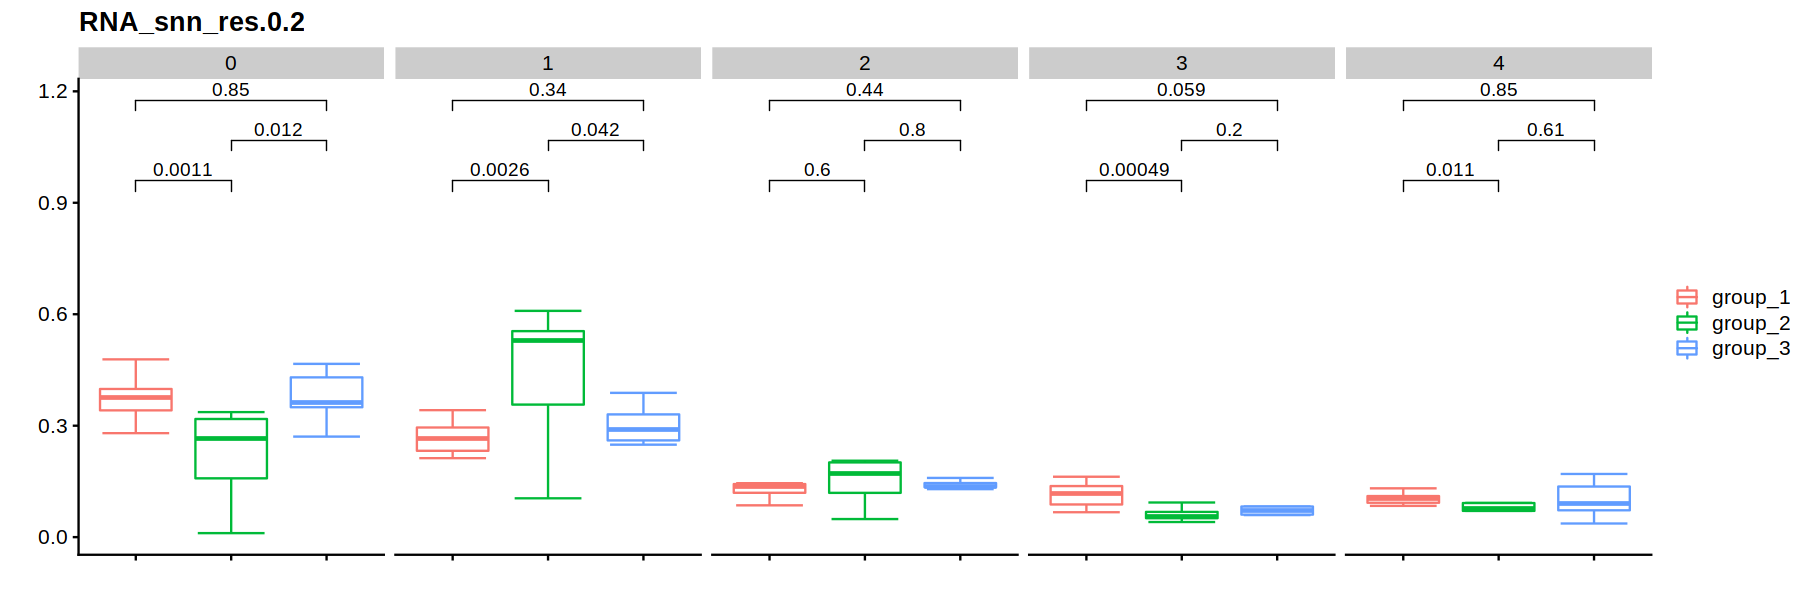

`summarise()` has grouped output by 'patient_region_id'. You can override using the `.groups` argument.



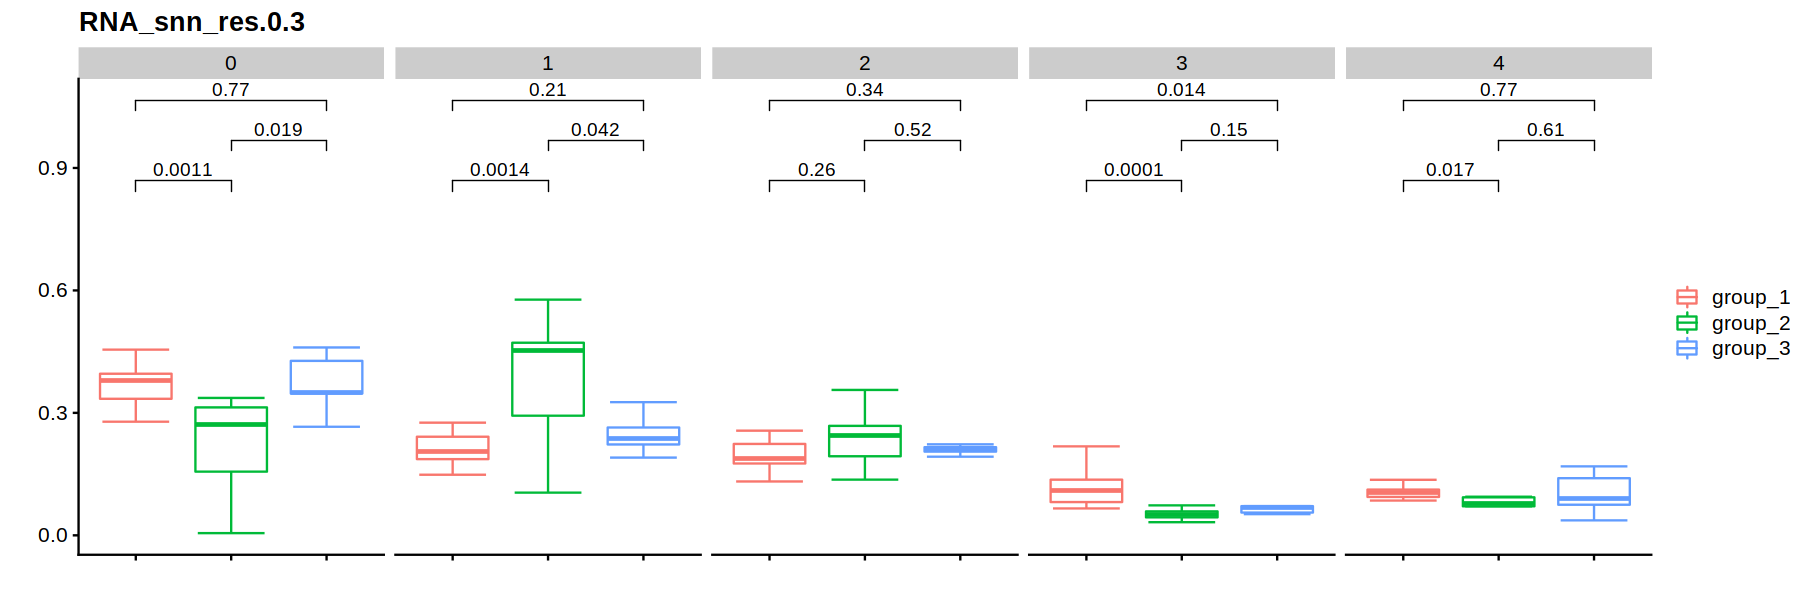

`summarise()` has grouped output by 'patient_region_id'. You can override using the `.groups` argument.



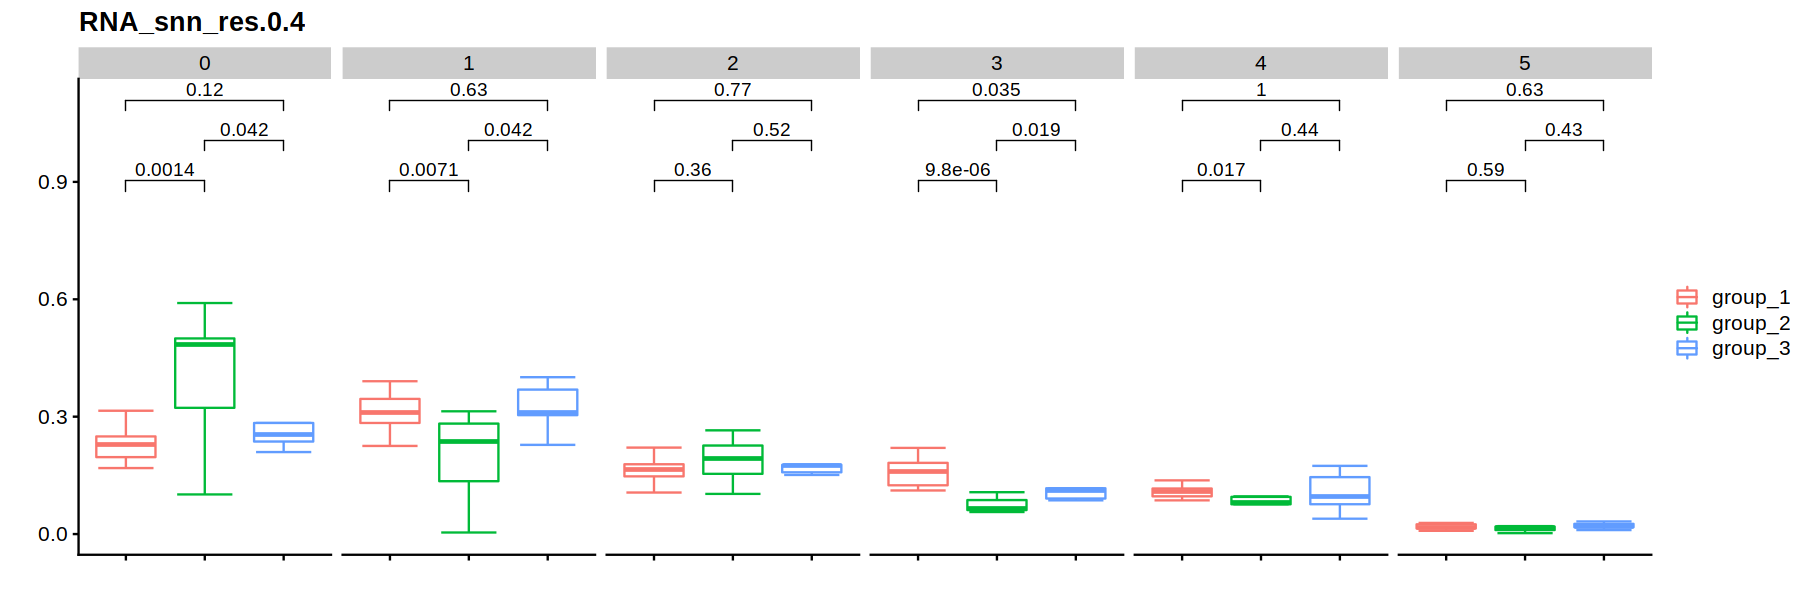

`summarise()` has grouped output by 'patient_region_id'. You can override using the `.groups` argument.



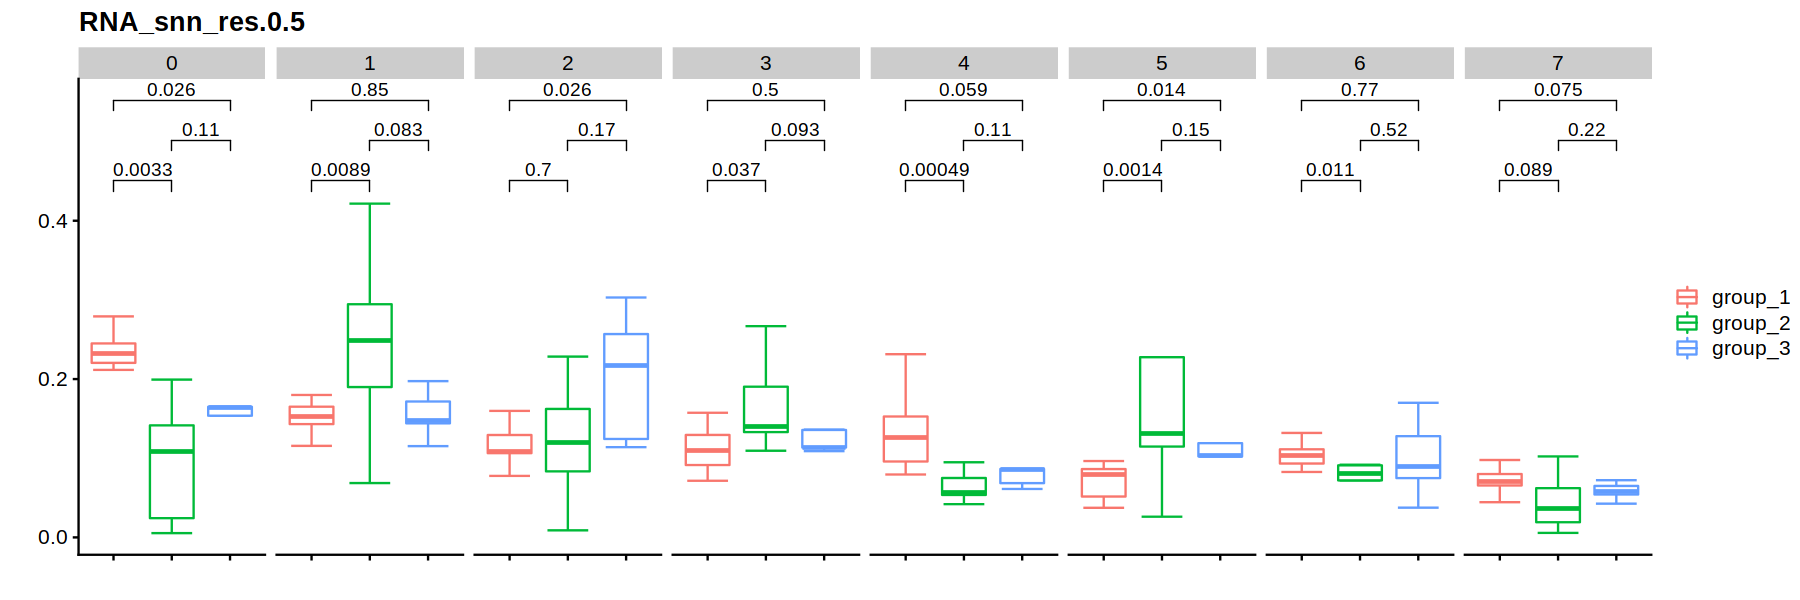

`summarise()` has grouped output by 'patient_region_id'. You can override using the `.groups` argument.



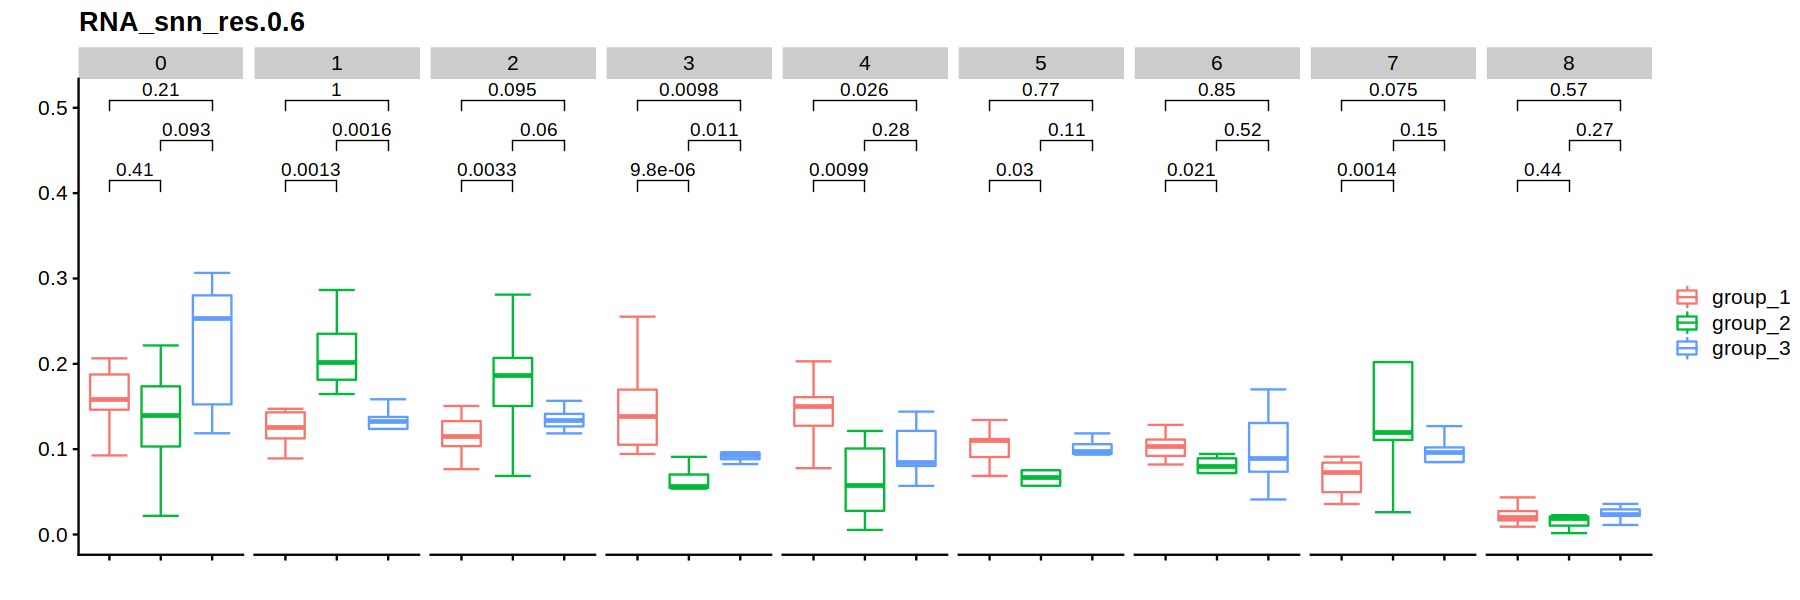

`summarise()` has grouped output by 'patient_region_id'. You can override using the `.groups` argument.



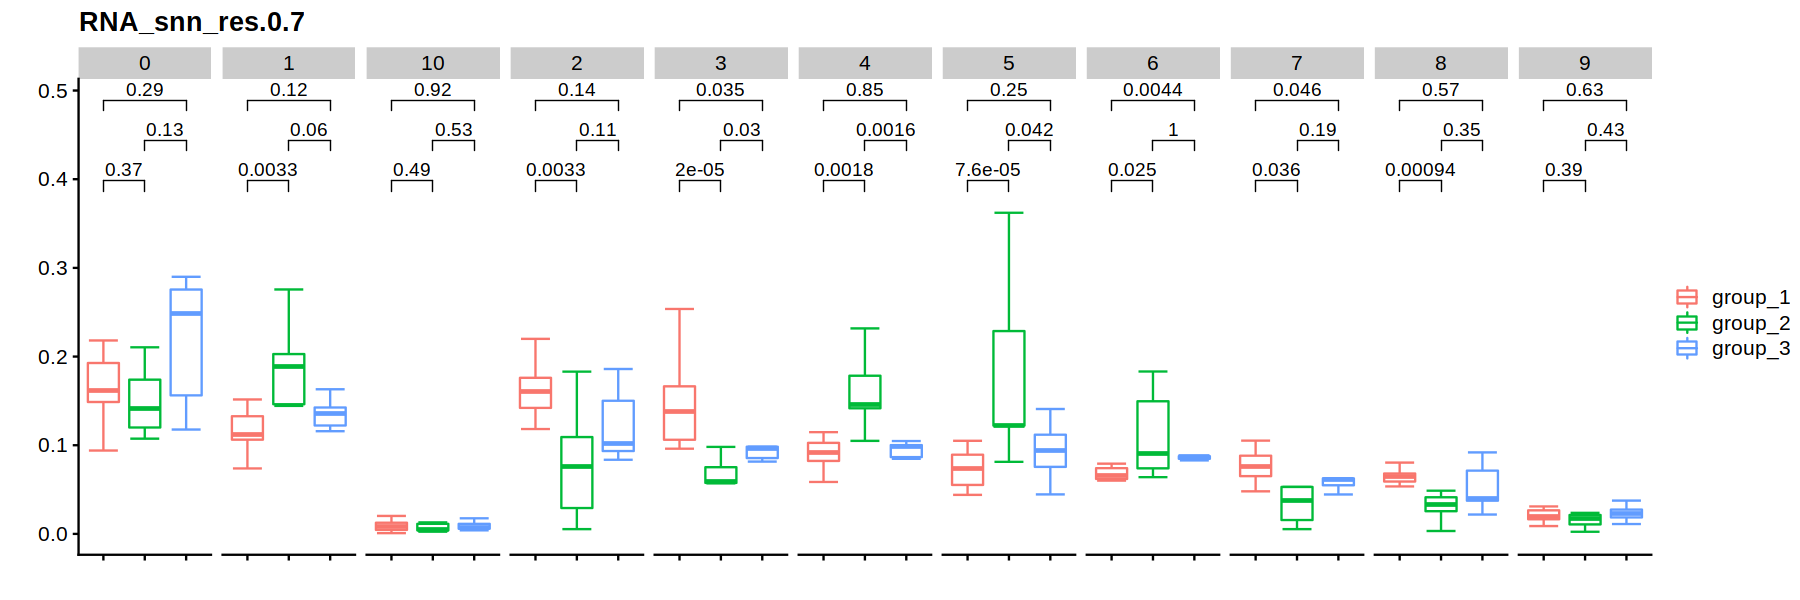

`summarise()` has grouped output by 'patient_region_id'. You can override using the `.groups` argument.



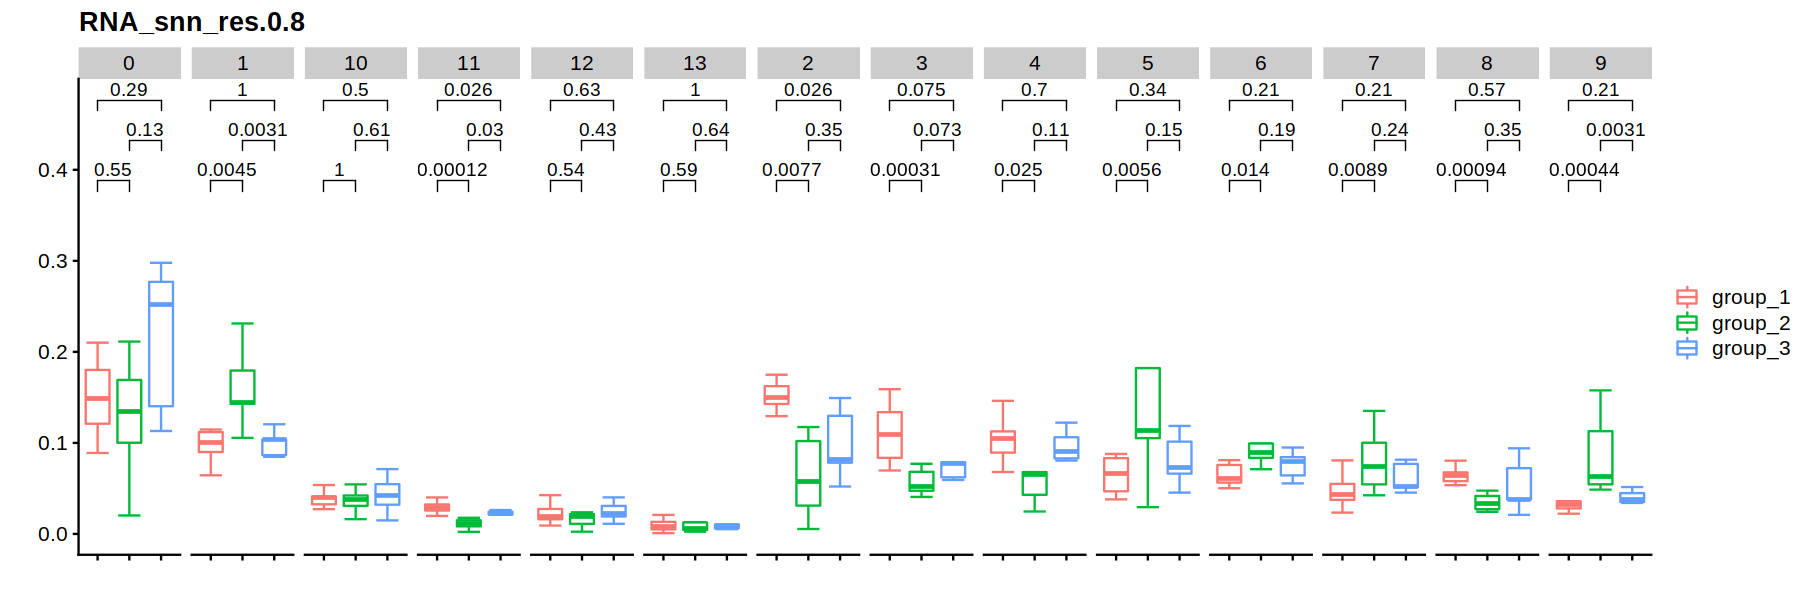

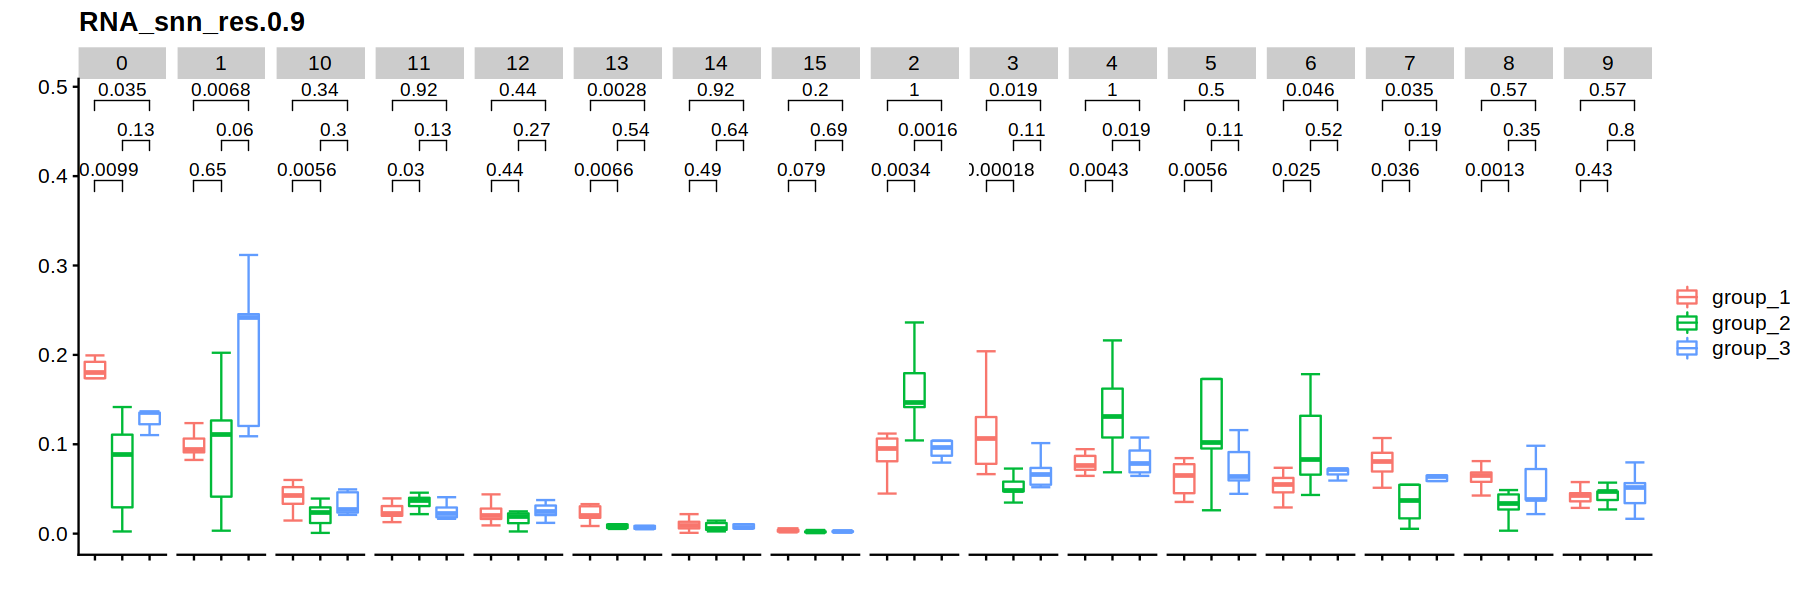

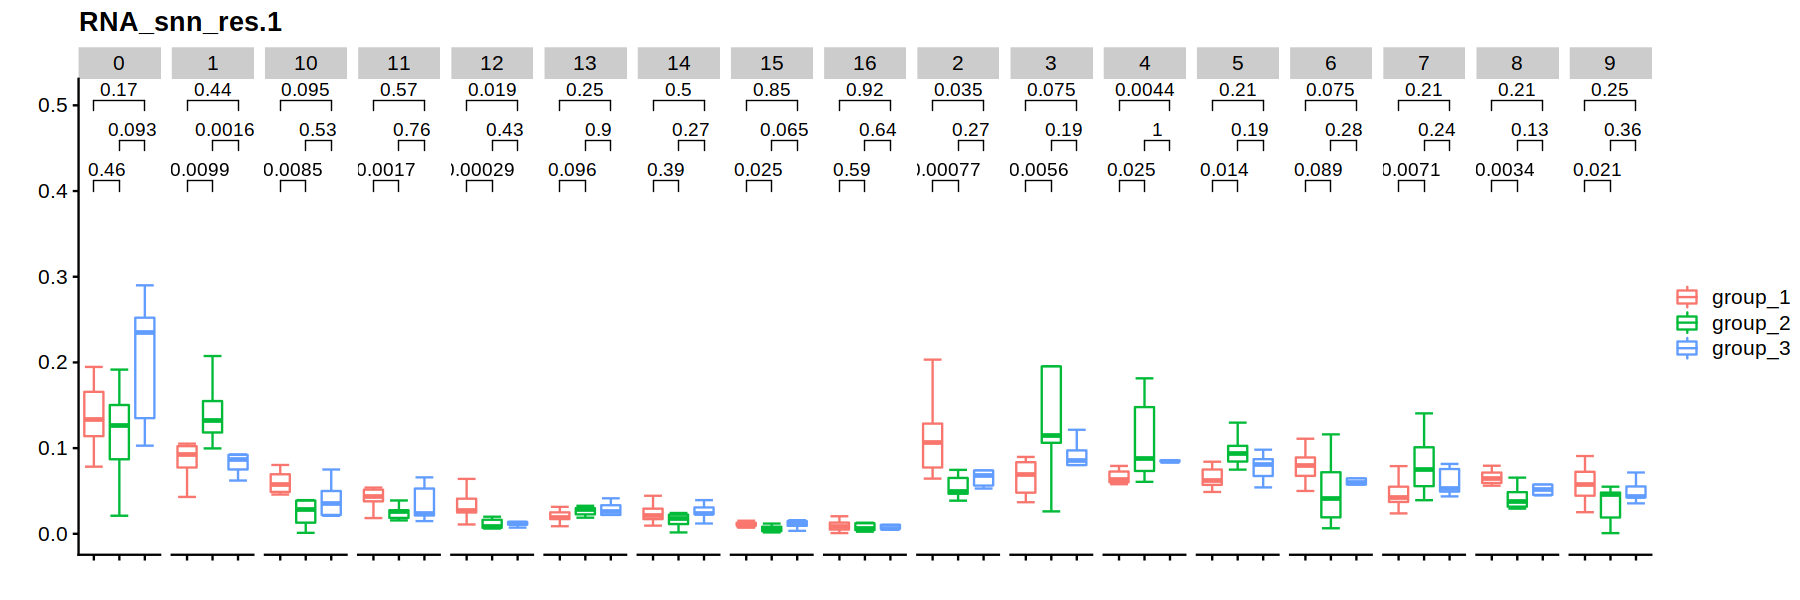

In [11]:
for(res in resolutions){
    df_plot <- coembed@meta.data %>%
    as.data.frame() %>%
    subset(., select = c("patient_region_id", glue::glue("RNA_snn_res.{res}")))
    
    colnames(df_plot) <- c("patient_region_id", "Clusters")
    
    df_plot <- df_plot %>% 
            group_by(patient_region_id, Clusters) %>%
            summarise(counts = n()) %>%
            mutate(proportion = counts / sum(counts))
    
    df_anno <- coembed@meta.data %>%
    as.data.frame() %>%
    subset(., select = c("patient_region_id", "patient_group")) %>%
    unique()
    
    df_plot <- merge.data.frame(df_plot, df_anno)
    
    p <- ggplot(data = df_plot, aes(x = patient_group, y = proportion)) +
    geom_boxplot2(aes(color = patient_group)) +
    facet_wrap(~Clusters, nrow = 1) +
    stat_compare_means(comparisons = list(c("group_1", "group_2"),
                                         c("group_2", "group_3"),
                                         c("group_1", "group_3")),
                   method = "wilcox.test") +
    theme_cowplot() +
    xlab("") + ylab("") +
    ggtitle(glue::glue("RNA_snn_res.{res}")) +
    theme(axis.text.x = element_blank(),
         legend.title = element_blank())

options(repr.plot.width = 15, repr.plot.height = 5)

print(p)
}

In [6]:
# df_plot <- coembed@meta.data %>%
#     as.data.frame() %>%
#     group_by(patient_region_id, RNA_snn_res.0.4) %>%
#     summarise(counts = n()) %>%
#     mutate(proportion = counts / sum(counts))

# head(df_plot)

# cols <- ArchR::paletteDiscrete(df_plot$RNA_snn_res.0.4)

# p <- ggplot(data = df_plot, aes(x = patient_region_id, y = proportion, fill = RNA_snn_res.0.4)) +
#     geom_bar(stat = "identity") +
#     #facet_wrap(~tech, nrow = 1) +
#     scale_fill_manual(values = cols) +
#     theme_cowplot() +
#     xlab("") + ylab("") +
#     theme(axis.text.x = element_text(angle = 60, hjust = 1))

# options(repr.plot.width = 20, repr.plot.height = 10)

# p

# df_anno <- coembed@meta.data %>%
#     as.data.frame() %>%
#     subset(., select = c("patient_region_id", "patient_group")) %>%
#     unique()

# df_plot <- merge.data.frame(df_plot, df_anno)

# p <- ggplot(data = df_plot, aes(x = patient_group, y = proportion)) +
#     geom_boxplot(aes(color = patient_group)) +
#     facet_wrap(~RNA_snn_res.0.4, nrow = 3) +
#     stat_compare_means(comparisons = list(c("group_1", "group_2"),
#                                          c("group_1", "group_3"),
#                                          c("group_2", "group_3")),
#                    method = "wilcox.test") +
#     theme_cowplot()

# options(repr.plot.width = 15, repr.plot.height = 10)

# p